# Results_300
This contains results of my 3rd research question 'What python packages are similar by description?'

## Purpose
* This notebook shows the clusters created by using k-means to group similar packages together
* The clusters and centroids are shown
* A heatmap is also included at the end to show similarities between some packages

In [16]:
#Import relevant libraries
import matplotlib
import matplotlib.pyplot as plt
import nltk
import numpy as np
import operator
import pandas as pd
import string
from sklearn import metrics
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
df_tokens = pd.read_csv('../data/CSV_files/df_tokens.csv') 

In [18]:
df_tokens.head()

,Description,Name,tokens,train_clean_content
0,It provides:\r\r\n\r\r\n- a powerful N-dimensi...,numpy,"['provides', 'powerful', 'N', 'dimensional', '...",provides powerful N dimensional array object s...
1,"**pandas** is a Python package providing fast,...",pandas,"['panda', 'python', 'package', 'providing', 'f...",panda python package providing fast flexible e...
2,Use `scikit-learn < instead.,sklearn,"['use', 'scikit', 'learn', 'instead']",use scikit learn instead
3,Matplotlib strives to produce publication qual...,matplotlib,"['matplotlib', 'strives', 'produce', 'publicat...",matplotlib strives produce publication quality...
4,Seaborn is a library for making statistical gr...,seaborn,"['seaborn', 'library', 'making', 'statistical'...",seaborn library making statistical graphic pyt...


Tokens column was changed when saved to CSV so will be cleaned removing commas, square brakets and quote marks

In [19]:
df_tokens['tokens'] = [i.replace("'", '') for i in df_tokens['tokens']]

In [21]:
df_tokens['tokens'] = pd.DataFrame([str(line).strip('[').strip(']').replace("'","") for line in df_tokens['tokens']])

In [22]:
df_tokens['tokens'] = [i.replace(",", '') for i in df_tokens['tokens']]

In [23]:
df_tokens.head()

,Description,Name,tokens,train_clean_content
0,It provides:\r\r\n\r\r\n- a powerful N-dimensi...,numpy,provides powerful N dimensional array object s...,provides powerful N dimensional array object s...
1,"**pandas** is a Python package providing fast,...",pandas,panda python package providing fast flexible e...,panda python package providing fast flexible e...
2,Use `scikit-learn < instead.,sklearn,use scikit learn instead,use scikit learn instead
3,Matplotlib strives to produce publication qual...,matplotlib,matplotlib strives produce publication quality...,matplotlib strives produce publication quality...
4,Seaborn is a library for making statistical gr...,seaborn,seaborn library making statistical graphic pyt...,seaborn library making statistical graphic pyt...


In [24]:
df_cosine = pd.read_csv('../data/CSV_files/cosine_sim.csv') # dataframe of cosine similarities

In [25]:
documents = df_tokens['tokens'].apply(lambda x: ('').join(x))
documents.head()

0    provides powerful N dimensional array object s...
1    panda python package providing fast flexible e...
2                             use scikit learn instead
3    matplotlib strives produce publication quality...
4    seaborn library making statistical graphic pyt...
Name: tokens, dtype: object

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(documents)
pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names()).head()

,00000000000000000012085cfe8c79bcdacf81fbd82f6ab52c3cb3a454d4987c,000000000000i,0000000000aaaaa,0000000000bbbbb,00000000e,00000156e,00000538b374c1cbfaeed7253ad3075ddc72a28f0a0515301fc1bbed675f2316,00000539d17a03af7126e073be4c4d99a72b7f58793cf2c87b9bfd41b6c711fb,0000ff,000e,...,한국어,한다,함수는,함수실행로그,함수에서,허용한다,호출하도록,ﬂubberiﬁc,ｌｏｕｄ,ｎｏｉｓｅｓ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finding tf-idf of words in corpus.

Tf-idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

# K-Means Clustering w/ PCA

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same cluster are more similar to each other than to those in other clusters. After computing the tf-idf scores, research was done in order to find the most suitable method for clustering texts. K-Means clustering was then chosen. K-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean. Python has a library 'scikit-learn' which is used for machine learning and has a k-means cluster feature so the clusters and their centroids could be computed with ease.

PCA (principal component analysis) and t-SNE (t-distributed Stochastic Neighbor Embedding) were also applied before the clustering algorithm. These are both dimension reduction techniques that improve the clustering results in practice (noise reduction).

The cell below takes 40 mins to run

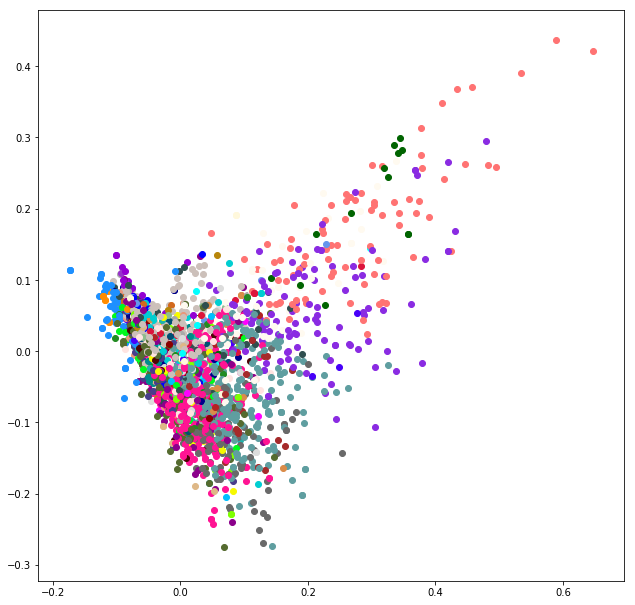

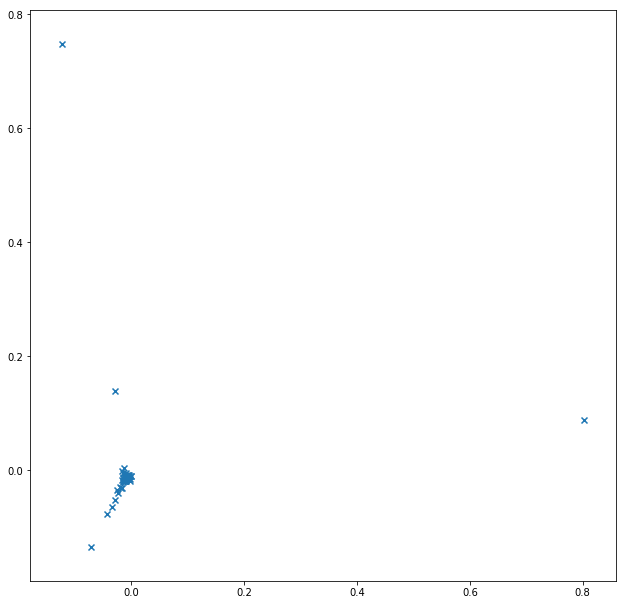

In [61]:
labels_color_map = {
    0: '#20b2aa', 1: '#ff7373', 2: '#ffe4e1', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#f6f900', 8: '#00f91d', 9: '#da8c49',
    10: '#0000FF', 11: '#8A2BE2', 12: '#A52A2A', 13: '#DEB887', 14: '#5F9EA0', 
    15: '#7FFF00', 16: '#D2691E', 17: '#FF7F50', 18: '#6495ED', 19: '#FFF8DC', 
    20: '#DC143C', 21: '#00FFFF', 22: '#00008B', 23: '#008B8B', 24: '#B8860B', 
    25: '#A9A9A9', 26: '#006400', 27: '#8B008B', 28: '#556B2F', 29: '#8B008B',
    30: '#556B2F', 31: '#FF8C00', 32: '#9932CC', 33: '#8B0000', 34: '#E9967A',
    35: '#8FBC8F', 36: '#483D8B', 37: '#2F4F4F', 38: '#2F4F4F', 39: '#00CED1',
    40: '#9400D3', 41: '#FF1493', 42: '#00BFFF', 43: '#696969', 44: '#1E90FF', 
    45: '#B22222', 46: '#FFFAF0', 47: '#228B22', 48: '#FF00FF', 49: '#DCDCDC',
    50: '#FFD700'}

pca_num_components = 2
num_clusters = 50
max_iterations = 1200

# create k-means model with custom config
clustering_model = KMeans(
    n_clusters=num_clusters,
    max_iter=max_iterations)

labels = clustering_model.fit_predict(tf_idf_matrix)

X = tf_idf_matrix.todense()

# ----------------------------------------------------------------------------------------------------------------------

reduced_data = PCA(n_components=pca_num_components)
reduced_data1 = reduced_data.fit_transform(X)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data1):
    pca_comp_1, pca_comp_2 = reduced_data1[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)
plt.show()

tsne_init = 'pca'
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, learning_rate=tsne_learning_rate)

centroids = clustering_model.cluster_centers_
transformed_centroids = reduced_data.fit_transform(centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)
plt.show()

# K-Means Clustering and t-SNE

Both cells below take 40 mins to run

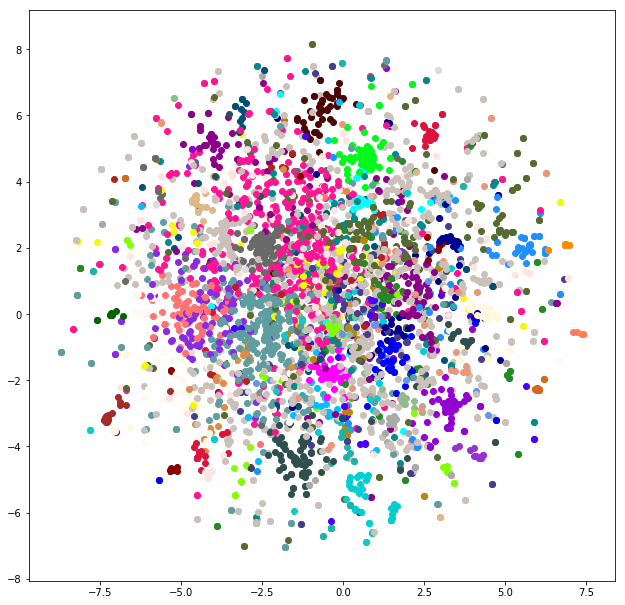

In [71]:
tsne_init = 'pca'  
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, learning_rate=tsne_learning_rate)
reduced_data1 = model.fit_transform(X)

fig, ax = plt.subplots()
for index, instance in enumerate(reduced_data1):
    pca_comp_1, pca_comp_2 = reduced_data1[index]
    color = labels_color_map[labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)
plt.show()

## Centroids of clusters

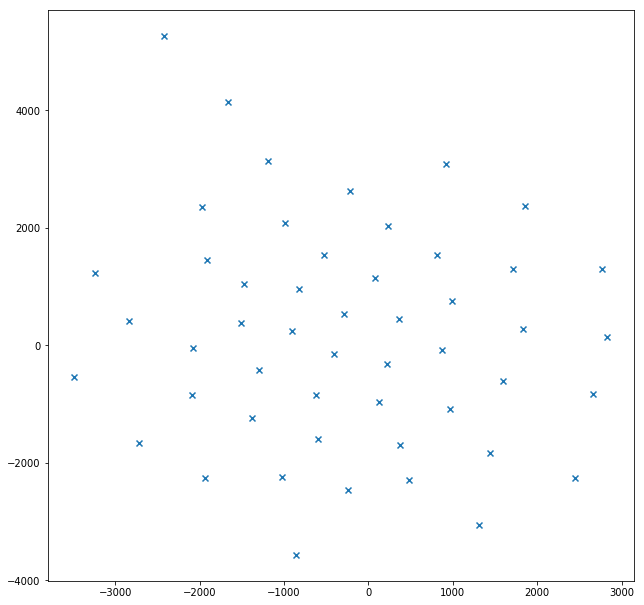

In [68]:
tsne_init = 'pca' 
tsne_learning_rate = 1000
random_state = 1
model = TSNE(n_components=2, random_state=random_state, init=tsne_init, learning_rate=tsne_learning_rate)

centroids = clustering_model.cluster_centers_
transformed_centroids = model.fit_transform(centroids)
plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10.5, 10.5)
plt.show()

I had to manually search for clusters (centroids) by looking at the points of each cluster below

In [78]:
transformed_centroids

array([[-3234.72509766,  1221.76867676],
       [  965.9241333 , -1089.72180176],
       [  482.23934937, -2299.76000977],
       [ 1600.52233887,  -614.02050781],
       [  377.71914673, -1705.93237305],
       [ -290.97311401,   522.51208496],
       [ -858.71032715, -3567.19091797],
       [  872.27600098,   -89.82250214],
       [ 2764.52294922,  1289.52246094],
       [ 2655.41967773,  -835.08343506],
       [-1934.98156738, -2267.53588867],
       [-1027.98327637, -2251.12451172],
       [ 1829.97412109,   275.6824646 ],
       [ -599.74523926, -1594.69689941],
       [-1505.03186035,   380.50637817],
       [-2088.29052734,  -851.8651123 ],
       [ 2826.62451172,   136.69589233],
       [ -618.31134033,  -846.31311035],
       [ 1853.39318848,  2363.5324707 ],
       [  367.38128662,   442.74432373],
       [-1667.26623535,  4142.10400391],
       [ 1716.12341309,  1293.47167969],
       [ -524.67626953,  1528.92480469],
       [-1916.6192627 ,  1440.13916016],
       [ -245.06

## Top 5 terms in each cluster

In [105]:
print("Top terms per cluster:")
order_centroids = centroids.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(num_clusters):
    top_five_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_five_words)))

Top terms per cluster:
Cluster 0: matplotlib plot plotly figure placeholder
Cluster 1: image target alt documentation status
Cluster 2: print list github python import
Cluster 3: progress bar em provides python
Cluster 4: database sql db table toolkit
Cluster 5: python wrapper algorithm framework function
Cluster 6: panda dataframe dataframes data msqldb
Cluster 7: path python window command os
Cluster 8: client python api library server
Cluster 9: project license documentation information see
Cluster 10: analysis data tool package python
Cluster 11: alt target image status python
Cluster 12: or the software of in
Cluster 13: datetime date time dt economic
Cluster 14: install python pip code package
Cluster 15: vector geometry grid gdal coordinate
Cluster 16: utils enum toolkit red common
Cluster 17: implimention knn apriori python logistic
Cluster 18: simulation physic neuron specifying retina
Cluster 19: utility programming functional python classifier
Cluster 20: see binding python 

### A dataframe containing all the packages and their respective cluster number

In [63]:
results = pd.DataFrame()
results['text'] = documents
results['category'] = labels
results['name'] = df_tokens['Name']
results

,text,category,name
0,provides powerful N dimensional array object s...,5,numpy
1,panda python package providing fast flexible e...,36,pandas
2,use scikit learn instead,5,sklearn
3,matplotlib strives produce publication quality...,24,matplotlib
4,seaborn library making statistical graphic pyt...,36,seaborn
5,conversion given time input proper format,41,time
6,scipy pronounced sigh pie open source software...,5,scipy
7,tensorflow open source software library high p...,40,tensorflow
8,datetime package encapsulation date time value...,13,DateTime
9,fast CSV parser python,35,csv


* Below is an example of a cluster. 
* This is cluster one. 
* I have examples of more interesting clusters in my report.

In [113]:
results.loc[results['category'] == 1]

,text,category,name
80,pydotplus python interface graphviz dot langua...,1,pydotplus
99,corner py image target image target image targ...,1,corner
102,torchvision image target image target image ta...,1,torchvision
132,image target image target image target image t...,1,root-numpy
140,pycall image alt pycall release target image a...,1,pycall
183,python stop word content table content overvie...,1,stop-words
219,image target align center alt pytest image tar...,1,pytest
254,image alt simpeg logo simpeg image target alt ...,1,SimPEG
258,george fast flexible gaussian process regressi...,1,george
309,_l README README image target alt build status...,1,jyquickhelper


# Heatmap of cosine similarities

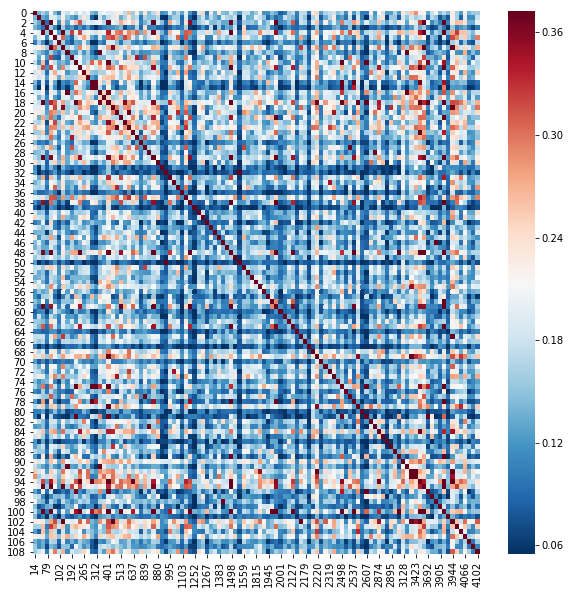

In [12]:
# Plot the heatmap of cosine matrix
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(df_cosine, annot=False,robust=True, fmt="f", cmap='RdBu_r')
plt.savefig('../data/images/heatmap.png', dpi = 100)
plt.show()

In [15]:
df_tokens.iloc[8]

Description            The DateTime package\r\r\n====================...
Name                                                            DateTime
tokens                 [datetime, package, encapsulation, date, time,...
train_clean_content    datetime package encapsulation date time value...
noun_tokens            ['package', 'encapsulation', 'date', 'time', '...
Name: 8, dtype: object

Above is a plot of a heatmap containing some of the packages. I created a min threshold of less than 3720 0.0 cosine similarities. It left me with 90 of the 4000+ packages andd still and very inconclusive map. This was not conclusive enough for use in the report.